In [1]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 Laptop GPU
Using device: cuda


# Modelling

## Install YOLOv8

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks



Ultralytics 8.3.160  Python-3.12.3 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Setup complete  (8 CPUs, 15.7 GB RAM, 37.2/275.0 GB disk)

OS                  Windows-11-10.0.26100-SP0
Environment         Windows
Python              3.12.3
Install             git
Path                D:\GitHub\driver-drowsiness-detection\.venv\Lib\site-packages\ultralytics
RAM                 15.70 GB
Disk                37.2/275.0 GB
CPU                 11th Gen Intel Core(TM) i7-11370H 3.30GHz
CPU count           8
GPU                 NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB
GPU count           1
CUDA                11.8

numpy                2.2.6>=1.23.0
matplotlib           3.10.3>=3.3.0
opencv-python        4.11.0.86>=4.6.0
pillow               11.2.1>=7.1.2
pyyaml               6.0.2>=5.3.1
requests             2.32.4>=2.23.0
scipy                1.16.0>=1.4.1
torch                2.7.1+cu118>=1.8.0
torch                2.7.1+cu118!=2.4.0,>=1.8.0; sys_platform == "w

In [3]:
model = YOLO("yolov8s.yaml")

model.train(
    data="../data/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    workers=4,
    name="yolov8s_krisnawan_V1",
    device=0,
    patience=10,
    lr0=0.005,
    weight_decay=0.0001,

    hsv_s=0.0,  # Menonaktifkan augmentasi Saturation
    hsv_v=0.0,  # Menonaktifkan augmentasi Value/Brightness/Shadow
)

Ultralytics 8.3.160  Python-3.12.3 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.0, hsv_v=0.0, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_krisnawan_V1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=T

100%|██████████| 5.35M/5.35M [00:01<00:00, 5.21MB/s]


AMP: checks passed 
train: Fast image access  (ping: 0.40.0 ms, read: 6.21.6 MB/s, size: 51.5 KB)


train: Scanning D:\GitHub\driver-drowsiness-detection\data\train\labels.cache... 5088 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5088/5088 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.50.4 ms, read: 3.50.7 MB/s, size: 36.1 KB)


val: Scanning D:\GitHub\driver-drowsiness-detection\data\valid\labels.cache... 333 images, 0 backgrounds, 0 corrupt: 100%|██████████| 333/333 [00:00<?, ?it/s]


Plotting labels to d:\GitHub\driver-drowsiness-detection\runs\detect\yolov8s_krisnawan_V1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0001), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to d:\GitHub\driver-drowsiness-detection\runs\detect\yolov8s_krisnawan_V1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.71G      2.009       2.43      2.949         34        640: 100%|██████████| 318/318 [05:03<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        333        333      0.519      0.894      0.602      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.44G      1.232      1.257       1.87         31        640: 100%|██████████| 318/318 [09:20<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]

                   all        333        333      0.477      0.789      0.689      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.44G      1.109      1.016      1.714         37        640: 100%|██████████| 318/318 [04:24<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.01it/s]

                   all        333        333       0.65      0.871      0.911      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.44G      1.044     0.9055      1.625         34        640: 100%|██████████| 318/318 [03:59<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]

                   all        333        333      0.824      0.745      0.923      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.44G     0.9929     0.8368      1.569         30        640: 100%|██████████| 318/318 [03:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.01it/s]

                   all        333        333      0.752      0.884      0.947      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.43G     0.9561      0.808       1.54         29        640: 100%|██████████| 318/318 [13:50<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.03it/s]

                   all        333        333      0.638      0.874      0.774      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.43G     0.9149     0.7711      1.498         42        640: 100%|██████████| 318/318 [04:27<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        333        333      0.601      0.978      0.884      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.44G     0.9164     0.7524      1.497         26        640: 100%|██████████| 318/318 [13:19<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.96it/s]

                   all        333        333       0.89      0.911      0.968       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.44G     0.8954     0.7311      1.474         28        640: 100%|██████████| 318/318 [03:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]

                   all        333        333      0.757      0.829      0.909      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.44G      0.869     0.7305      1.447         34        640: 100%|██████████| 318/318 [02:47<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.03it/s]

                   all        333        333      0.754      0.849      0.798      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.44G     0.8623      0.702      1.438         36        640: 100%|██████████| 318/318 [04:08<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        333        333      0.779       0.92      0.937      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.44G     0.8515     0.7082      1.425         33        640: 100%|██████████| 318/318 [02:15<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.30it/s]

                   all        333        333      0.761      0.959      0.931      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.43G     0.8334     0.6845      1.412         40        640: 100%|██████████| 318/318 [03:06<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.69it/s]

                   all        333        333      0.748      0.825      0.843      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.43G     0.8396     0.6898      1.419         31        640: 100%|██████████| 318/318 [06:21<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]

                   all        333        333      0.758      0.846      0.926       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.44G     0.8189     0.6859      1.402         32        640: 100%|██████████| 318/318 [11:23<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]

                   all        333        333      0.772      0.926      0.937      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.43G     0.8108     0.6763      1.396         36        640: 100%|██████████| 318/318 [03:52<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        333        333      0.857        0.9      0.947      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.44G      0.804     0.6611      1.382         26        640: 100%|██████████| 318/318 [04:26<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]

                   all        333        333      0.759      0.838      0.914      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.44G     0.8079     0.6647      1.388         34        640: 100%|██████████| 318/318 [02:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]

                   all        333        333      0.756      0.942      0.942      0.712


EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 8, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

18 epochs completed in 1.720 hours.
Optimizer stripped from d:\GitHub\driver-drowsiness-detection\runs\detect\yolov8s_krisnawan_V1\weights\last.pt, 22.5MB
Optimizer stripped from d:\GitHub\driver-drowsiness-detection\runs\detect\yolov8s_krisnawan_V1\weights\best.pt, 22.5MB

Validating d:\GitHub\driver-drowsiness-detection\runs\detect\yolov8s_krisnawan_V1\weights\best.pt...
Ultralytics 8.3.160  Python-3.12.3 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8s summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]


                   all        333        333       0.89      0.911      0.968      0.731
                 awake        227        227      0.962      0.894      0.977      0.751
                drowsy        106        106      0.817      0.927      0.958       0.71
Speed: 0.6ms preprocess, 6.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to d:\GitHub\driver-drowsiness-detection\runs\detect\yolov8s_krisnawan_V1


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002013D9B9370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

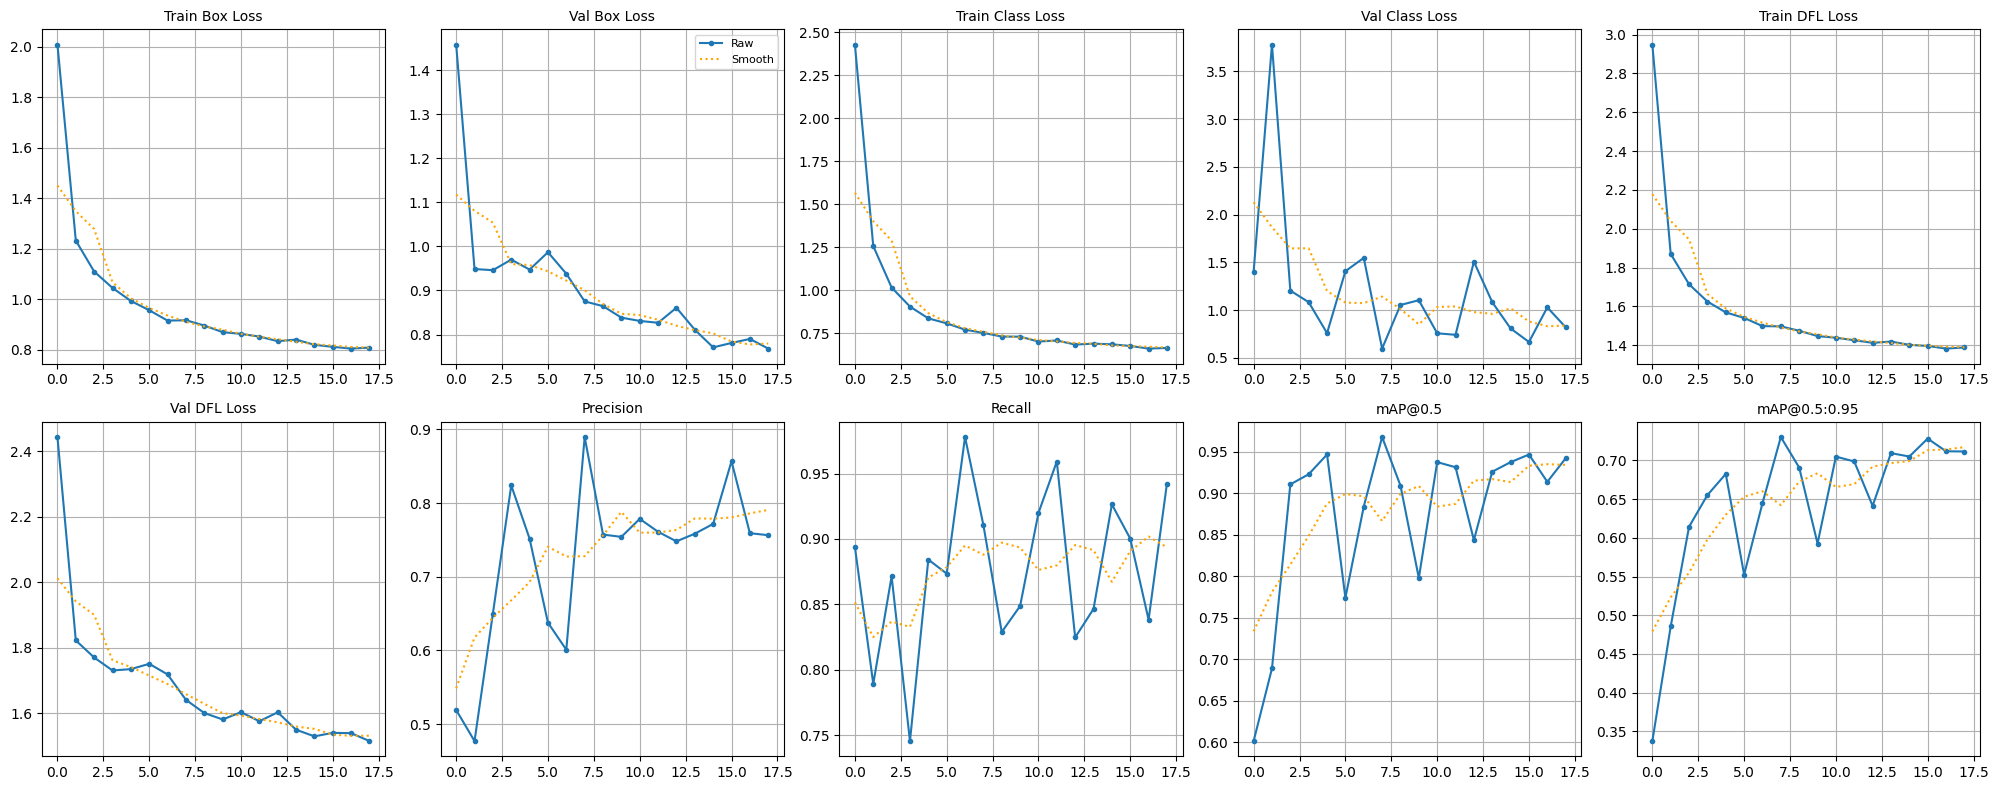

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load hasil training
csv_path = '../runs/detect/yolov8s_krisnawan_V1/results.csv'
df = pd.read_csv(csv_path)

# Fungsi smoothing (moving average)
def smooth(series, window_size=5):
    return series.rolling(window=window_size, min_periods=1, center=True).mean()

# Daftar metrik penting
metrics_plot = {
    'train/box_loss': 'Train Box Loss',
    'val/box_loss': 'Val Box Loss',
    'train/cls_loss': 'Train Class Loss',
    'val/cls_loss': 'Val Class Loss',
    'train/dfl_loss': 'Train DFL Loss',
    'val/dfl_loss': 'Val DFL Loss',
    'metrics/precision(B)': 'Precision',
    'metrics/recall(B)': 'Recall',
    'metrics/mAP50(B)': 'mAP@0.5',
    'metrics/mAP50-95(B)': 'mAP@0.5:0.95'
}

# Buat grid 2 baris x 5 kolom
plt.figure(figsize=(20, 8))
for i, (metric, title) in enumerate(metrics_plot.items()):
    if metric in df.columns:
        plt.subplot(2, 5, i + 1)
        plt.plot(df[metric], 'o-', markersize=3, label='Raw')
        plt.plot(smooth(df[metric]), 'orange', linestyle='dotted', label='Smooth')
        plt.title(title, fontsize=10)
        plt.grid(True)
        if i == 1:
            plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


## Simpan Model

In [25]:
from ultralytics import YOLO

model = YOLO('../runs/detect/yolov8s_krisnawan_V1/weights/best.pt')

model.save('../models/yolov8s_krisnawan_best_backup.pt')



In [26]:
# Load model terbaik
model = YOLO('../models/yolov8s_krisnawan_best_backup.pt')

# Evaluasi hanya pada data test
metrics = model.val(data='../data/data.yaml', split='test', conf=0.25)


Ultralytics 8.3.160  Python-3.12.3 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8s summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.30.1 ms, read: 4.60.8 MB/s, size: 41.2 KB)


val: Scanning D:\GitHub\driver-drowsiness-detection\data\test\labels... 332 images, 0 backgrounds, 0 corrupt: 100%|██████████| 332/332 [00:00<00:00, 342.32it/s]

val: New cache created: D:\GitHub\driver-drowsiness-detection\data\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.77it/s]


                   all        332        332      0.868      0.907      0.934      0.729
                 awake        228        228      0.941       0.91      0.953      0.745
                drowsy        104        104      0.795      0.904      0.915      0.713
Speed: 0.9ms preprocess, 11.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to d:\GitHub\driver-drowsiness-detection\runs\detect\val


In [38]:
predict_results = model.predict(source='../data/test/images', save=True, conf=0.25)
pred_dir = predict_results[0].save_dir


image 1/332 d:\GitHub\driver-drowsiness-detection\notebooks\..\data\test\images\frame_1016_jpg.rf.c62f6aae454fb704923ffe796cb7aa2c.jpg: 640x640 1 drowsy, 75.1ms
image 2/332 d:\GitHub\driver-drowsiness-detection\notebooks\..\data\test\images\frame_1017_jpg.rf.15ce5b5570e5e10ddc3c9ef8cf6ad8db.jpg: 640x640 1 drowsy, 75.2ms
image 3/332 d:\GitHub\driver-drowsiness-detection\notebooks\..\data\test\images\frame_1028_jpg.rf.fa827ddc6c9e91e3c97d3c455a4fb9d5.jpg: 640x640 1 drowsy, 76.6ms
image 4/332 d:\GitHub\driver-drowsiness-detection\notebooks\..\data\test\images\frame_1029_jpg.rf.bf90117a0d05917322d1df1039db92ee.jpg: 640x640 1 drowsy, 16.3ms
image 5/332 d:\GitHub\driver-drowsiness-detection\notebooks\..\data\test\images\frame_102_jpg.rf.737c5860346c99e3dd072559731d104a.jpg: 640x640 1 awake, 16.6ms
image 6/332 d:\GitHub\driver-drowsiness-detection\notebooks\..\data\test\images\frame_1033_jpg.rf.52be7ff7bd52ee39f9c7e4c1ba35d510.jpg: 640x640 1 drowsy, 17.4ms
image 7/332 d:\GitHub\driver-drowsi

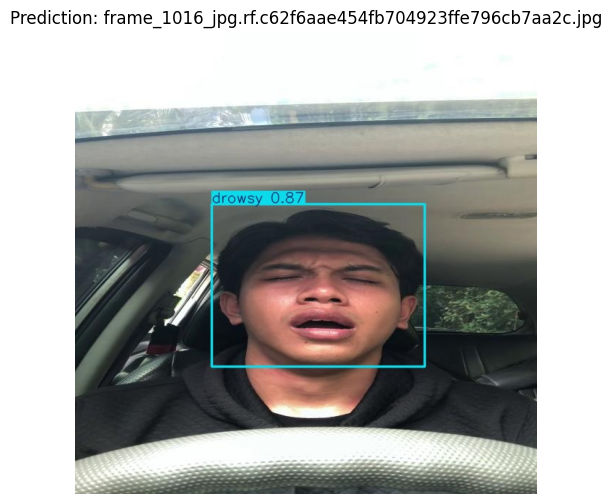

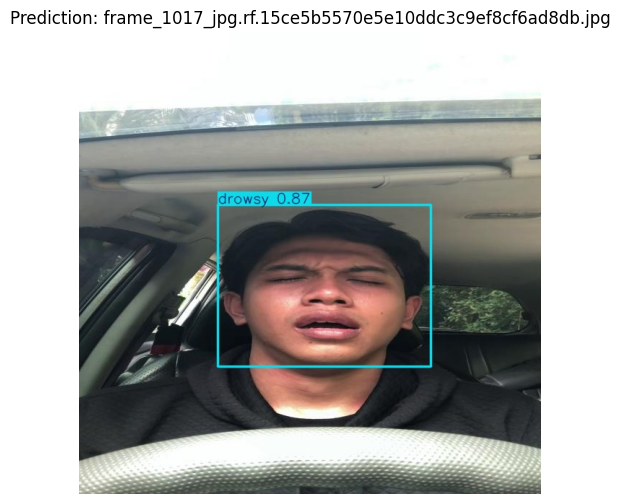

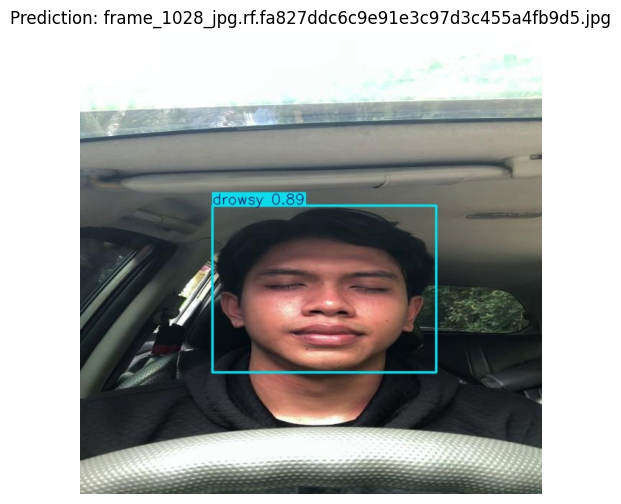

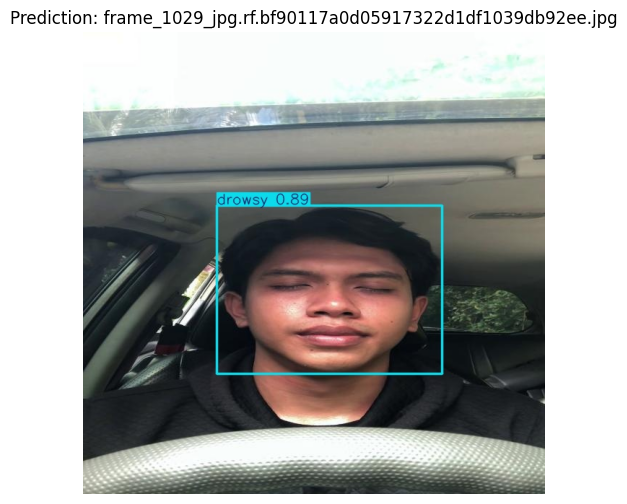

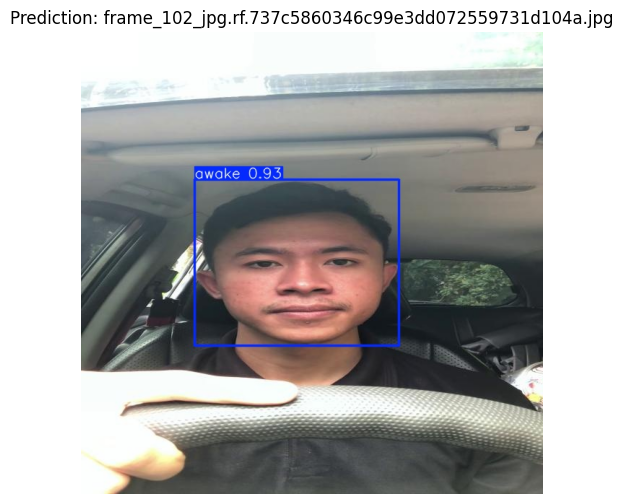

In [39]:
import os, cv2
import matplotlib.pyplot as plt

pred_imgs = sorted([f for f in os.listdir(pred_dir) if f.endswith(('.jpg', '.png'))])[:5]

for fname in pred_imgs:
    img_path = os.path.join(pred_dir, fname)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {fname}")
    plt.show()

## Evaluasi

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import os

# Path ke label ground truth (format YOLO)
label_dir = '../data/test/labels'  # disesuaikan dengan struktur dataset Anda
y_true, y_pred = [], []

# Loop semua file label (asumsikan 1 objek per gambar)
for i, f in enumerate(sorted(os.listdir(label_dir))):
    # Ambil ground truth class
    label_path = os.path.join(label_dir, f)
    with open(label_path, 'r') as file:
        lines = file.readlines()
        true_cls = int(lines[0].split()[0]) if lines else -1
    y_true.append(true_cls)

    # Ambil prediksi class dari hasil YOLO
    pred_classes = predict_results[i].boxes.cls.cpu().numpy().astype(int) if predict_results[i].boxes else []
    pred_cls = pred_classes[0] if len(pred_classes) > 0 else -1
    y_pred.append(pred_cls)

# Filter hanya data valid (tanpa -1)
valid_idx = [i for i in range(len(y_true)) if y_true[i] != -1 and y_pred[i] != -1]
y_true_eval = [y_true[i] for i in valid_idx]
y_pred_eval = [y_pred[i] for i in valid_idx]


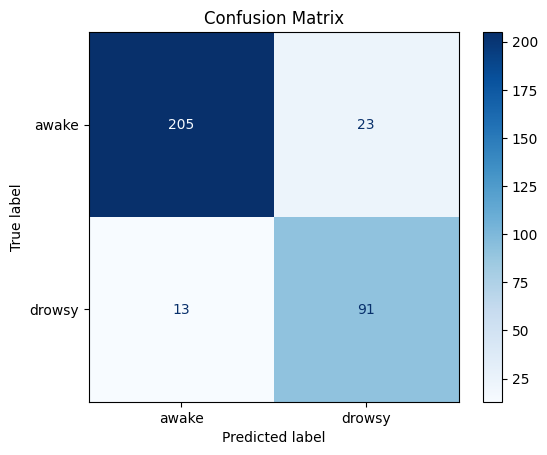

In [42]:
ConfusionMatrixDisplay.from_predictions(
    y_true_eval, y_pred_eval,
    display_labels=['awake', 'drowsy'],
    cmap='Blues'
)
plt.title("Confusion Matrix")
plt.show()


In [43]:
print("Classification Report:\n")
print(classification_report(
    y_true_eval, y_pred_eval,
    target_names=['awake', 'drowsy']
))


Classification Report:

              precision    recall  f1-score   support

       awake       0.94      0.90      0.92       228
      drowsy       0.80      0.88      0.83       104

    accuracy                           0.89       332
   macro avg       0.87      0.89      0.88       332
weighted avg       0.90      0.89      0.89       332

